In [34]:
from tqdm import tqdm
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [35]:
transform = torchvision.transforms.Compose([torchvision.transforms.Resize((224,224)),
                                            torchvision.transforms.ToTensor(),
                                            torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.ImageFolder(root='PlantVillage/train', transform=transform)

In [42]:
def make_weights_for_balanced_classes(images, nclasses):                        
    count = [0] * nclasses                                                      
    for item in images:                                                         
        count[item[1]] += 1                                                     
    weight_per_class = [0.] * nclasses                                      
    N = float(sum(count))                                                   
    for i in range(nclasses):                                                   
        weight_per_class[i] = N/float(count[i])                                 
    weight = [0] * len(images)                                              
    for idx, val in enumerate(images):                                          
        weight[idx] = weight_per_class[val[1]]                               
    return weight

In [43]:
weights = make_weights_for_balanced_classes(trainset.imgs, len(trainset.classes))                                                                
weights = torch.DoubleTensor(weights)                                       
sampler = torch.utils.data.sampler.WeightedRandomSampler(weights, len(weights))

In [44]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1, sampler=sampler, pin_memory=True)

testset = torchvision.datasets.ImageFolder(root='PlantVillage/val', transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False)

In [45]:
len(weights)

44016

In [46]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [47]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        n_classes = 39
        
        hidden_1 = 1024
        hidden_2 = 256
        
        self.fc1 = nn.Linear(9216, hidden_1)
        self.fc2 = nn.Linear(hidden_1, hidden_2)
        self.fc3 = nn.Linear(hidden_2, n_classes)
        
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = x.view(-1, 9216)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

net = torchvision.models.alexnet(pretrained=True)

for param in net.parameters():
    param.requires_grad = False
net.classifier = Net()
net.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Net(
    (fc1): Linear(in_features=9216, out_features=1024, bias=True)
    (fc2): Linear(in_features=1024, out_featu

In [48]:
# net = torchvision.models.alexnet(pretrained=False)
# net = net.to(device)

In [49]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adadelta(net.parameters())

In [127]:
# valid_loss_min=np.Inf
# train_loss_plt=[]
# valid_loss_plt = []
# valid_accuracy_plt=[]
# valid_loss = []
# for epoch in tqdm(range(20)):
#     train_loss=0
#     valid_loss=0
    
#     net.train()
#     for images, labels in trainloader:
#         images, labels = images.to(device), labels.to(device)
#         optimizer.zero_grad()
#         output = net(images)
#         loss = criterion(output, labels)
#         loss.backward()
#         optimizer.step()
#         train_loss += loss.item() * images.size(0)
    
#     net.eval()
#     for images, labels in testloader:
#         images, labels= images.cuda(), labels.cuda()
#         output = net(images)
#         loss = criterion(output, labels)
#         valid_loss += loss.item() * images.size(0)
        
#     train_loss /= len(trainloader)
#     valid_loss /= len(testloader)
#     train_loss_plt.append(train_loss)
#     valid_loss.append(valid_loss)
#     valid_loss_plt.append(valid_loss)

#     print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(epoch+1, train_loss,valid_loss))




  0%|          | 0/20 [00:00<?, ?it/s]


  5%|▌         | 1/20 [02:39<50:32, 159.59s/it]

Validation loss decreased (inf --> 1.054633).  Saving model ...





 10%|█         | 2/20 [05:19<47:54, 159.67s/it]

Validation loss decreased (1.054633 --> 0.945961).  Saving model ...





 15%|█▌        | 3/20 [07:59<45:14, 159.69s/it]

Validation loss decreased (0.945961 --> 0.685085).  Saving model ...





 20%|██        | 4/20 [10:38<42:35, 159.71s/it]

Validation loss decreased (0.685085 --> 0.635240).  Saving model ...





 25%|██▌       | 5/20 [13:19<39:57, 159.83s/it]

Validation loss decreased (0.635240 --> 0.600305).  Saving model ...





 30%|███       | 6/20 [15:59<37:19, 159.99s/it]

Validation loss decreased (0.600305 --> 0.595277).  Saving model ...





 35%|███▌      | 7/20 [18:40<34:42, 160.17s/it]


 40%|████      | 8/20 [21:20<32:04, 160.35s/it]


 45%|████▌     | 9/20 [24:01<29:24, 160.41s/it]


 50%|█████     | 10/20 [26:41<26:44, 160.45s/it]


 55%|█████▌    | 11/20 [29:22<24:05, 160.57s/it]


 60%|██████    | 12/20 [32:03<21:25, 160.68s/it]


 65%|██████▌   | 13/20 [34:44<18:45, 160.76s/it]


 70%|███████   | 14/20 [37:24<16:03, 160.61s/it]


 75%|███████▌  | 15/20 [40:14<13:35, 163.17s/it]


 80%|████████  | 16/20 [42:54<10:49, 162.44s/it]


 85%|████████▌ | 17/20 [45:35<08:05, 161.97s/it]


 90%|█████████ | 18/20 [48:16<05:23, 161.60s/it]


 95%|█████████▌| 19/20 [50:57<02:41, 161.43s/it]


100%|██████████| 20/20 [53:38<00:00, 160.93s/it]


In [198]:
import joblib
joblib.dump(train_loss_plt, 't.joblib')
joblib.dump(valid_loss_plt, 'v.joblib')

['v.joblib']

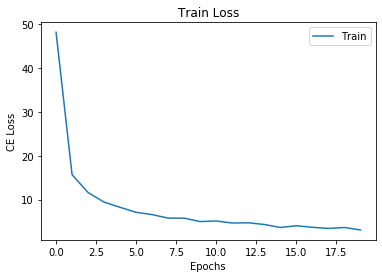

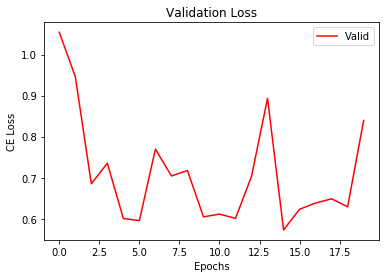

In [199]:
import matplotlib.pyplot as plt
plt.plot(np.arange(len(train_loss_plt)), train_loss_plt,label='Train')
plt.title('Train Loss')
plt.xlabel('Epochs')
plt.ylabel('CE Loss')
plt.legend()
plt.show()
plt.plot(np.arange(len(valid_loss_plt)),valid_loss_plt,label='Valid',color='r')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('CE Loss')
plt.legend()
plt.show()

In [237]:
x = [1,2,3]
y = [4,5,6]

In [249]:
for i,j in itertools.izip_longest(x,y):
    print (i)

AttributeError: module 'itertools' has no attribute 'izip_longest'

In [245]:
import itertools

In [50]:
net.load_state_dict(torch.load('model.pt'))
net.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Net(
    (fc1): Linear(in_features=9216, out_features=1024, bias=True)
    (fc2): Linear(in_features=1024, out_featu

1 64
0 0


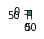

0 1


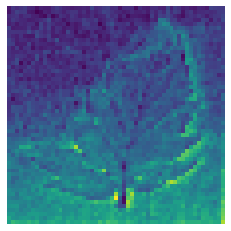

0 2


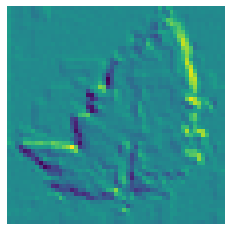

0 3


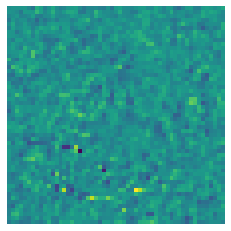

0 4


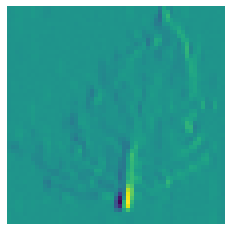

0 5


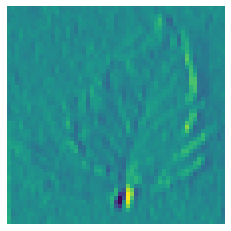

0 6


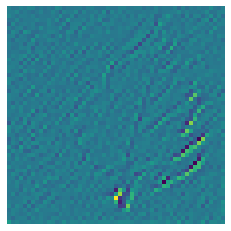

0 7


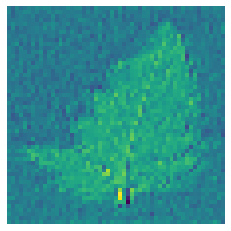

0 8


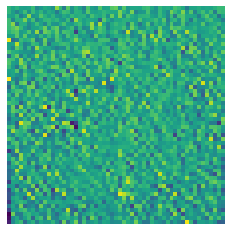

0 9


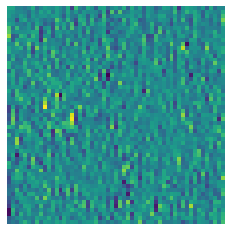

0 10


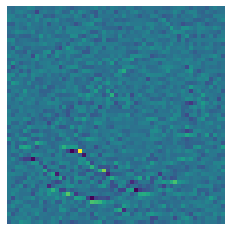

0 11


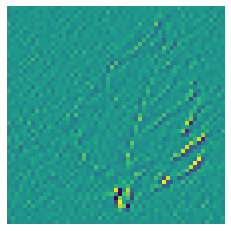

0 12


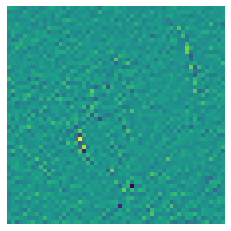

0 13


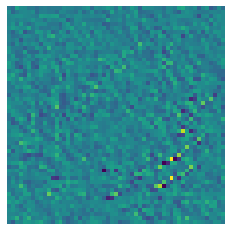

0 14


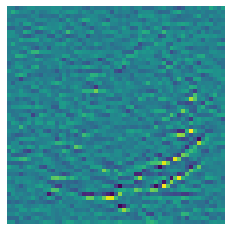

0 15


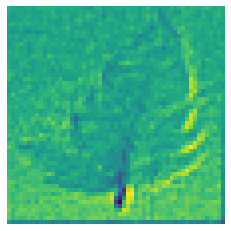

0 16


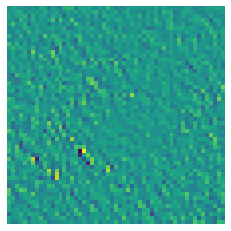

0 17


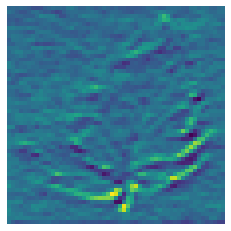

0 18


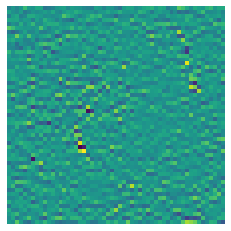

0 19


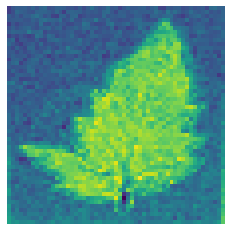

0 20


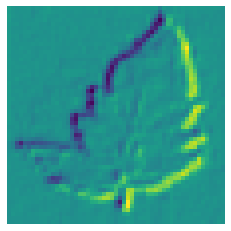

0 21


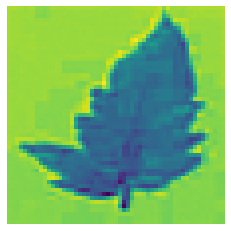

0 22


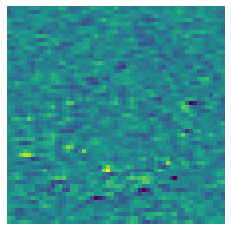

0 23


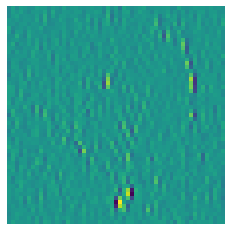

0 24


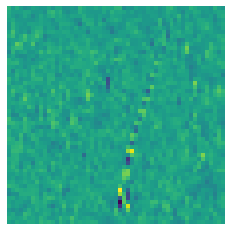

0 25


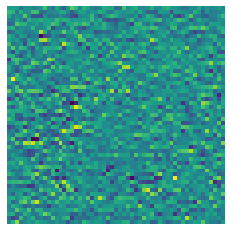

0 26


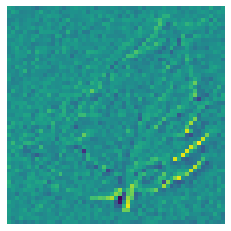

0 27


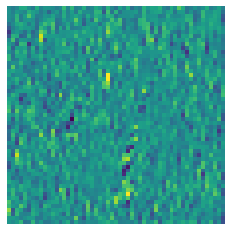

0 28


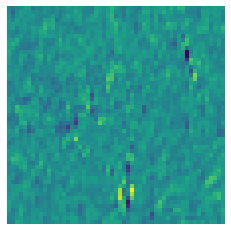

0 29


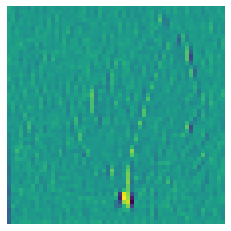

0 30


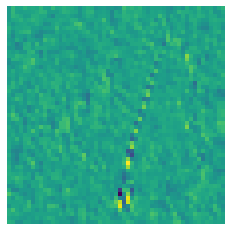

0 31


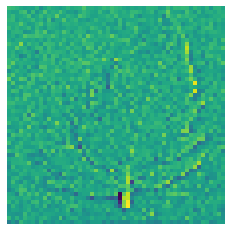

0 32


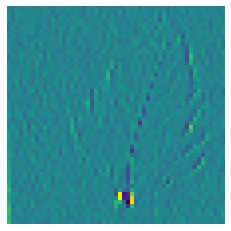

0 33


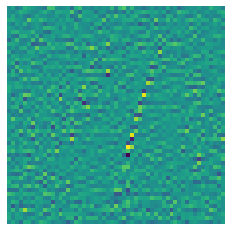

0 34


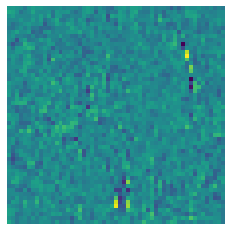

0 35


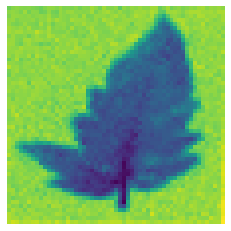

0 36


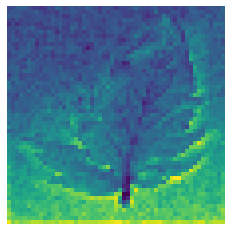

0 37


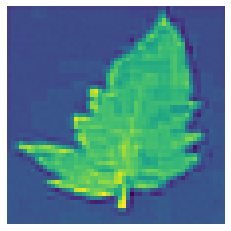

0 38


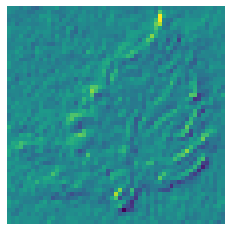

0 39


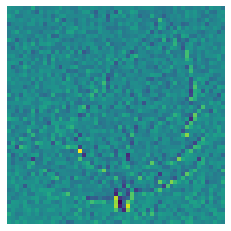

0 40


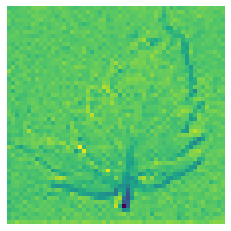

0 41


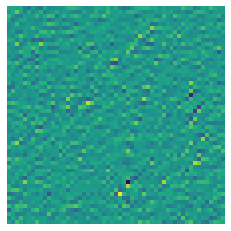

0 42


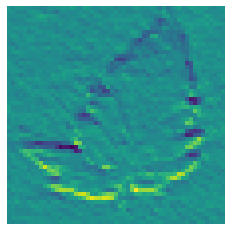

0 43


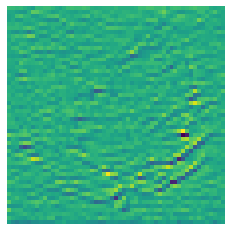

0 44


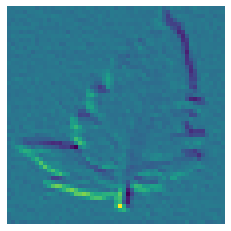

0 45


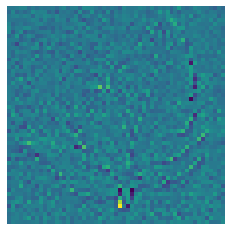

0 46


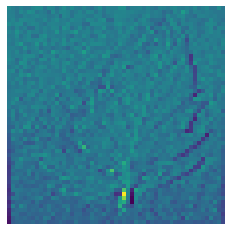

0 47


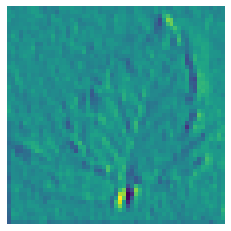

0 48


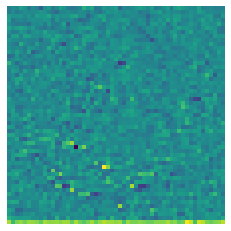

0 49


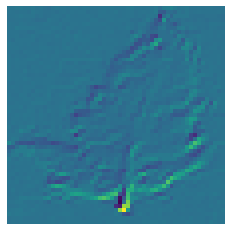

0 50


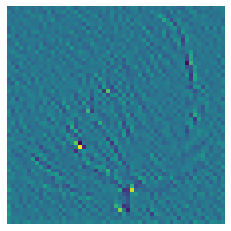

0 51


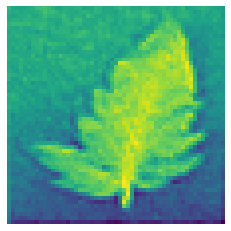

0 52


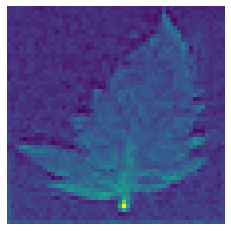

0 53


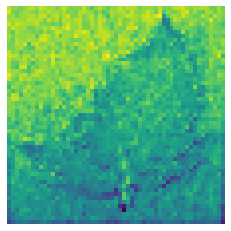

0 54


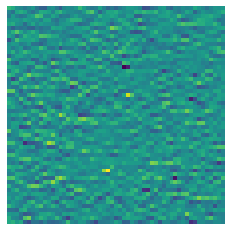

0 55


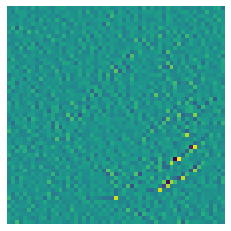

0 56


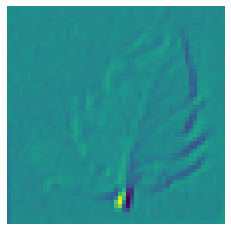

0 57


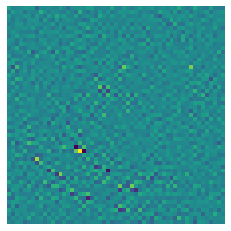

0 58


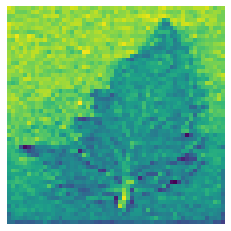

0 59


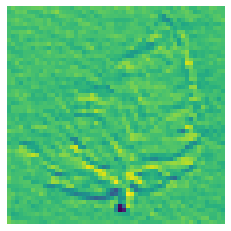

0 60


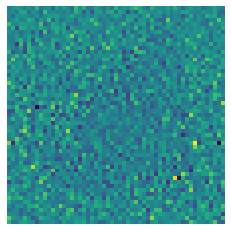

0 61


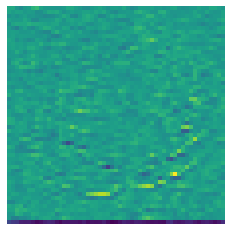

0 62


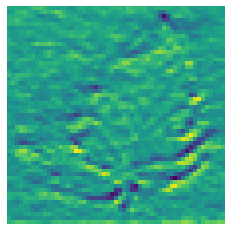

0 63


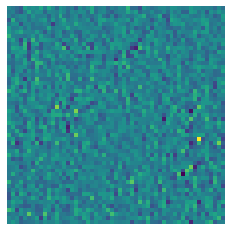

showd


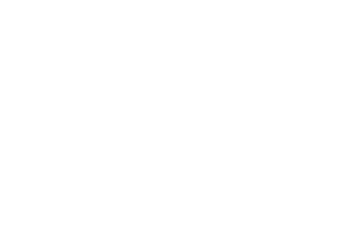

done


In [60]:
import matplotlib.pyplot as plt
def set_size(w,h, ax=None):
    if not ax: 
        ax=plt.gca()
        l = ax.figure.subplotpars.left
        r = ax.figure.subplotpars.right
        t = ax.figure.subplotpars.top
        b = ax.figure.subplotpars.bottom
        figw = float(w)/(r-l)
        figh = float(h)/(t-b)
        ax.figure.set_size_inches(figw, figh)

def custom_viz(kernels, path=None, cols=None):
    """Visualize weight and activation matrices learned 
    during the optimization process. Works for any size of kernels.

    Arguments
    =========
    kernels: Weight or activation matrix. Must be a high dimensional
    Numpy array. Tensors will not work.
    path: Path to save the visualizations.
    cols: TODO: Number of columns (doesn't work completely yet.)

    Example
    =======
    kernels = model.conv1.weight.cpu().detach().clone()
    kernels = kernels - kernels.min()
    kernels = kernels / kernels.max()
    custom_viz(kernels, 'results/conv1_weights.png', 5)
    """
    
    N = kernels.shape[0]
    C = kernels.shape[1]
    print(N,C)
    Tot = N*C

    # If single channel kernel with HxW size,# plot them in a row.# Else, plot image with C number of columns.
    if C>1:
        columns = C
    elif cols==None:
        columns = N
    elif cols:
        columns = cols
    rows = Tot // columns 
    rows += Tot % columns

    pos = range(1,Tot + 1)

    fig = plt.figure(1)
    fig.tight_layout()
    k=0
    for i in range(kernels.shape[0]):
        for j in range(kernels.shape[1]):
            print(i,j)
            img = kernels[i][j]
            ax = fig.add_subplot(rows,columns,pos[k])
#             ax.imshow(img, cmap='gray')
            plt.imshow(img)
            plt.show()
            plt.axis('off')
            k = k+1

    set_size(30,30,ax)
    if path:
        plt.savefig(path, dpi=100)
    print('showd')
    plt.show()


for images, labels in trainloader:
    conv1_out = net.features[0].forward(images.cuda())
    custom_viz(conv1_out.cpu().detach().clone(), 'conv1_actv.png')
    print('done')
    break

In [15]:
net.features[0]

Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))